In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


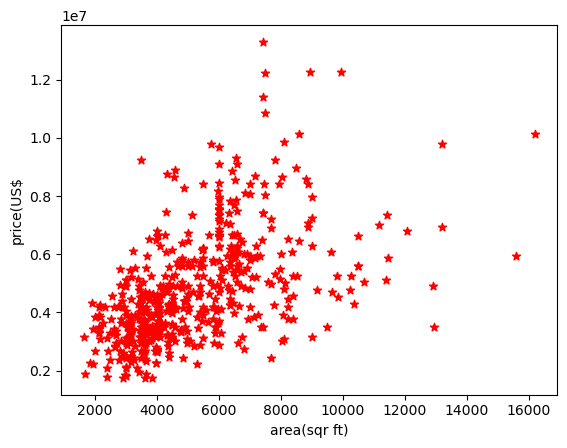

In [7]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$')
plt.scatter(df.area,df.price, color='red',marker='*')

In [9]:
reg = linear_model.LinearRegression()
reg .fit(df[['area']],df.price)









LinearRegression()

In [25]:
reg.predict([[2000]])

C:\Users\adity_uvypdil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3311258.270942])

In [29]:
#Slop
reg.coef_

array([461.97489427])

In [31]:
reg.intercept_

2387308.4823964303

In [33]:
# y=m*x+c
461.97489427*2000+2387308.4823964303

3311258.2709364304

Predicted price for 2000 sq ft: 3311258.270941997


C:\Users\adity_uvypdil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


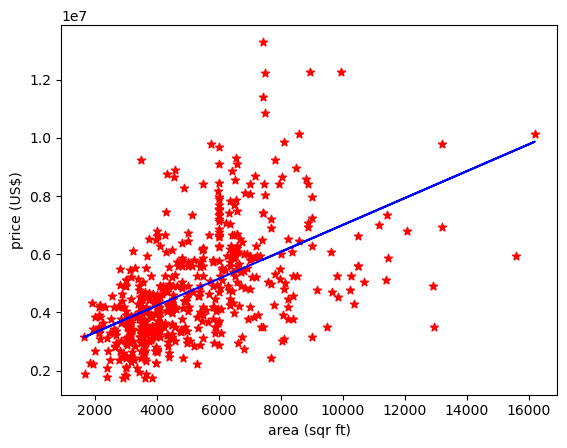

In [23]:
#OR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Assuming df is your DataFrame (load your data here if not already done)
# Example: df = pd.read_csv("your_file.csv")
# For now, assuming df is defined with your data

# Plotting
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area, df.price, color='red', marker='*')

# Linear Regression
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

# Predicting for area = 2000 sq ft (corrected)
prediction = reg.predict([[2000]])
print("Predicted price for 2000 sq ft:", prediction[0])

# Optional: Plot the regression line
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.show()

#if u have csv file with area only and u want to predict and fill the value of pridicted price


In [ ]:
d = pd.read_csv("areas.csv")
# d
d.head(3)

In [ ]:
p = reg.predict(d)
   #for new column and assign it to prediction.csv

In [ ]:
d['Price'] = p

In [ ]:
d.to_csv("Prediction.",index=False) #to csv method to export the prediction

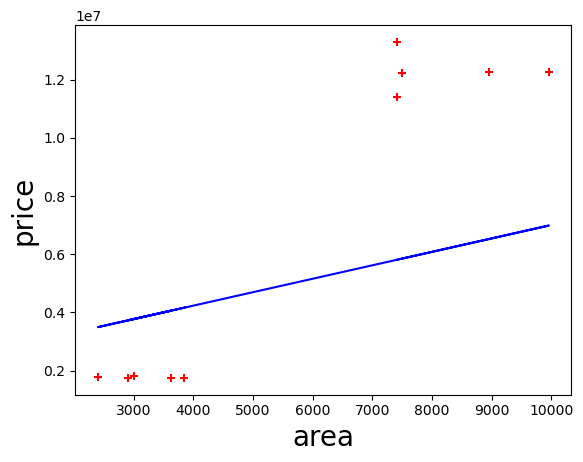

In [55]:
# for how does my LineaRegression line looks
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

Mean Squared Error: 649918005367.2047


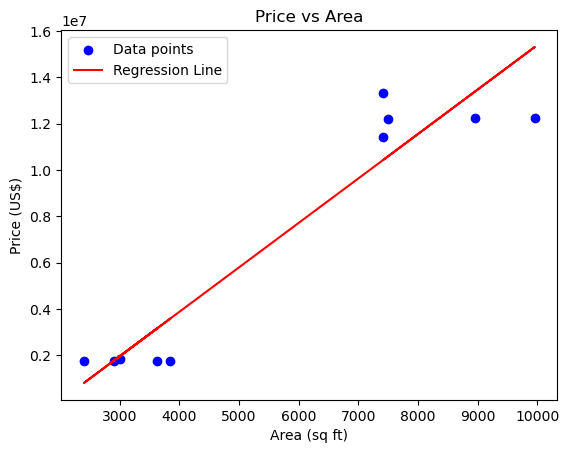

Predicted price for 2000 sq ft: 38092.48486250918


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Manually define the data (from your earlier example)
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000, 1820000, 1767150, 1750000, 1750000, 1750000],
    'area': [7420, 8960, 9960, 7500, 7420, 3000, 2400, 3620, 2910, 3850]
    # Other columns like bedrooms, bathrooms can be added for multiple regression
}
df = pd.DataFrame(data)

# Prepare features and target
X = df['area'].values.reshape(-1, 1)  # Reshape to 2D array for scikit-learn
Y = df['price'].values

# Split data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate mean squared error
# MSE measures the average squared difference between actual (Y_test) and predicted (Y_pred) prices.
# A lower MSE means better predictions, but here it’s in squared dollars (e.g., billions), so it’s large due to big price values.
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Visualize the data and regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (US$)')
plt.title('Price vs Area')
plt.legend()
plt.show()

# Predict price for a new area (2000 sq ft)
prediction = model.predict([[2000]])
print("Predicted price for 2000 sq ft:", prediction[0])

In [53]:
Let’s break down what `reshape` is doing in your code, why it’s needed, and why `-1` is used. I’ll keep it simple and clear since you’re not getting it yet.

### What’s Happening in Your Code?
In this line:
```python
X = df['area'].values.reshape(-1, 1)
```
- `df['area']` is a Pandas Series (a single column of data, like a list of areas: `[7420, 8960, 9960, ...]`).
- `.values` turns it into a NumPy array, but it’s still **1D** (one-dimensional), with a shape like `(10,)`—meaning 10 elements in a flat list.
- `reshape(-1, 1)` changes this 1D array into a **2D array** with a shape of `(10, 1)`—meaning 10 rows and 1 column.

### Why Reshape?
Scikit-learn’s `LinearRegression` expects the input features (`X`) to be a **2D array**, even if you’re using just one feature (like `area`). This is because:
- A 2D array can represent multiple features (e.g., `area`, `bedrooms`, `bathrooms`) as columns.
- Even with one feature, scikit-learn treats it as a matrix where each row is a sample (a house) and each column is a feature.

#### Without Reshape
If you skip `reshape` and use `X = df['area'].values`:
- `X` is 1D: `[7420, 8960, 9960, ...]` with shape `(10,)`.
- When you call `model.fit(X, Y)`, scikit-learn will throw an error because it expects a 2D array like `[[7420], [8960], [9960], ...]`.

#### With Reshape
After `reshape(-1, 1)`:
- `X` becomes 2D: `[[7420], [8960], [9960], ...]` with shape `(10, 1)`.
- Now `model.fit(X, Y)` works because `X` has rows (samples) and columns (features), even if there’s just one feature.

### Why `-1`?
The `-1` in `reshape(-1, 1)` is a special NumPy trick that means "figure out this dimension automatically." Here’s how it works:
- `reshape(rows, columns)` needs two numbers: how many rows and how many columns.
- You want 1 column (because `area` is one feature).
- You have 10 data points (rows), but you don’t want to hardcode `10`—you want it to work for any number of rows.
- `-1` tells NumPy: "I don’t care how many rows there are; just make it 1 column, and adjust the rows to fit all the data."

#### Example
- Your `df['area'].values` has 10 elements.
- `reshape(-1, 1)` says: "Make it 1 column, and let the rows be whatever fits 10 elements."
- Result: `(10, 1)` (10 rows, 1 column).

If you had 20 areas, `reshape(-1, 1)` would give `(20, 1)`—it adapts automatically.

### Visualizing It
- **Before reshape** (1D):
  ```
  [7420, 8960, 9960, 7500, 7420, 3000, 2400, 3620, 2910, 3850]
  Shape: (10,)
  ```
- **After reshape(-1, 1)** (2D):
  ```
  [[7420],
   [8960],
   [9960],
   [7500],
   [7420],
   [3000],
   [2400],
   [3620],
   [2910],
   [3850]]
  Shape: (10, 1)
  ```

### Why Not Hardcode `reshape(10, 1)`?
You *could* write `reshape(10, 1)` here since you have 10 rows, but `-1` is better because:
- It’s flexible: If your dataset grows (e.g., 100 houses later), the code still works without changing `10` to `100`.
- It’s a common practice in machine learning to make code reusable.

### Connection to Your Prediction Error
Remember your earlier error (`Expected 2D array, got scalar`) when you tried `reg.predict(2000)`? That’s related! 
- `fit` expects 2D input for training (`X`).
- `predict` expects 2D input for predictions too (e.g., `[[2000]]` instead of `2000`).
- `reshape(-1, 1)` ensures `X` is in the right format from the start.

### Quick Test to See It
Add this to your code to see the shapes:
```python
print("Before reshape:", df['area'].values.shape)
print("After reshape:", df['area'].values.reshape(-1, 1).shape)
```
Output:
```
Before reshape: (10,)
After reshape: (10, 1)
```

### Recap
- **What `reshape` does**: Turns a flat list (1D) into a table-like structure (2D) for scikit-learn.
- **Why `-1`**: Automatically sets the number of rows based on your data, keeping 1 column.
- **Why it’s needed**: Scikit-learn wants features as a 2D array, even for one feature.

Does that clear it up? If not, tell me what’s still confusing, and I’ll dig deeper!

[[7420]
 [8960]
 [9960]
 [7500]
 [7420]
 [3000]
 [2400]
 [3620]
 [2910]
 [3850]] [13300000 12250000 12250000 12215000 11410000  1820000  1767150  1750000
  1750000  1750000]
